<a href="https://colab.research.google.com/github/LuckyHorseshoe-chan/DatasetAnalysis/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Цель анализа – узнать, как личные признаки влияют на зарплату на каждой должности. Для этого будем использовать таблицу employees, которая дана в csv-формате. В данном случае личные признаки – пол и возраст. Предположим, что зарплаты стажёров-исследователей, младших научных сотрудников и научных сотрудников не сильно зависят от пола и возраста, а у более важных должностей – старших, главных и ведущих научных сотрудников, - личные признаки имеют значение.

Импортируем необходимые модули:

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore", FutureWarning)

Загрузим данные:

In [ ]:
# изменить путь, если диск называется по-другому
employees = pd.read_csv(filepath_or_buffer="./drive/MyDrive/НИР/employees.csv")

Посмотрим, как отображаются данные, и информацию о них

In [ ]:
employees.head()

,ID_employee,Пол,Возраст,Стаж,Должность,Зарплата
0,1,муж,68.0,10,младший научный сотрудник,70000.0
1,2,жен,42.0,7,научный сотрудник,80000.0
2,3,жен,34.0,63,ведущий научный сотрудник,190000.0
3,4,муж,75.0,15,младший научный сотрудник,120000.0
4,5,жен,76.0,38,младший научный сотрудник,90000.0


In [ ]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID_employee  1200 non-null   int64  
 1   Пол          1200 non-null   object 
 2   Возраст      1196 non-null   float64
 3   Стаж         1200 non-null   int64  
 4   Должность    1200 non-null   object 
 5   Зарплата     1193 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 56.4+ KB


Видим, что в столбцах “Возраст” и “Зарплата” есть пустые значения. Избавимся от них:

In [ ]:
employees = employees.dropna(how='any')
employees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID_employee  1189 non-null   int64  
 1   Пол          1189 non-null   object 
 2   Возраст      1189 non-null   float64
 3   Стаж         1189 non-null   int64  
 4   Должность    1189 non-null   object 
 5   Зарплата     1189 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 65.0+ KB


Преобразуем тип столбцов “Возраст” и “Зарплата” к int:

In [ ]:
employees['Возраст'] = employees['Возраст'].astype(int)
employees['Зарплата'] = employees['Зарплата'].astype(int)
employees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID_employee  1189 non-null   int64 
 1   Пол          1189 non-null   object
 2   Возраст      1189 non-null   int64 
 3   Стаж         1189 non-null   int64 
 4   Должность    1189 non-null   object
 5   Зарплата     1189 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 65.0+ KB


pandas.core.series.Series

Сделаем копию исправленного датафрейма empl и в неё добавим столбец с классификацией возрастных категорий age_cat:

In [ ]:
age_cat = {2: '20-29', 3: '30-39', 4: '40-49', 5: '50-59', 6: '60-69', 7: '70-79', 8: '80+', 9: '80+'}
empl = employees
empl['age_cat'] = empl['Возраст'] // 10
for id in empl['ID_employee']:
  empl['age_cat'][id-1] = age_cat[empl['age_cat'][id-1]]
empl.head(15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,ID_employee,Пол,Возраст,Стаж,Должность,Зарплата,age_cat
0,1,муж,68,10,младший научный сотрудник,70000,60-69
1,2,жен,42,7,научный сотрудник,80000,40-49
2,3,жен,34,63,ведущий научный сотрудник,190000,30-39
3,4,муж,75,15,младший научный сотрудник,120000,70-79
4,5,жен,76,38,младший научный сотрудник,90000,70-79
5,6,жен,30,37,научный сотрудник,100000,30-39
6,7,муж,62,9,старший научный сотрудник,20000,60-69
7,8,муж,68,44,ведущий научный сотрудник,60000,60-69
8,9,муж,70,41,старший научный сотрудник,20000,70-79
9,10,жен,62,54,научный сотрудник,170000,60-69


Создадим датафрейм piv_empl с информацией о распределении средней зарплаты по должностям, полу и возрастным категориям. 

In [ ]:
piv_empl = pd.pivot_table(empl, 
               values='Зарплата', 
               index=['Пол', 'age_cat'],
               columns=['Должность'], 
               aggfunc=np.mean)

In [ ]:
piv_empl

Должность    ведущий научный сотрудник  ...  старший научный сотрудник
Пол age_cat                             ...                           
жен 20-29                128000.000000  ...               94400.000000
    30-39                108421.052632  ...              125000.000000
    40-49                129444.444444  ...              107777.777778
    50-59                120000.000000  ...               74545.454545
    60-69                122222.222222  ...               98571.428571
    70-79                 68571.428571  ...              116923.076923
    80+                   86666.666667  ...              112500.000000
муж 20-29                100000.000000  ...               96363.636364
    30-39                105000.000000  ...              121176.470588
    40-49                110000.000000  ...               60000.000000
    50-59                120555.555556  ...               85000.000000
    60-69                 98461.538462  ...               97692.307692
    70-79                113333.333333  ...              104400.000000
    80+                  130625.000000  ...              102000.000000

[14 rows x 6 columns]

Таблица получилась объёмная, и для визуализации придётся строить много графиков, поэтому упростим выборку, оставив распределение средней зарплаты по должностям и возрастным категориям:

In [ ]:
piv_empl = pd.pivot_table(empl, 
               values='Зарплата', 
               index=['age_cat'],
               columns=['Должность'], 
               aggfunc=np.mean)
piv_empl

Должность,ведущий научный сотрудник,главный научный сотрудник,младший научный сотрудник,научный сотрудник,стажёр-исследователь,старший научный сотрудник
age_cat,,,,,,
20-29,117500.000000,107142.857143,109473.684211,119687.500000,101666.666667,95000.000000
30-39,107241.379310,117407.407407,96206.896552,92258.064516,114137.931034,121904.761905
40-49,120937.500000,96800.000000,110000.000000,104000.000000,105925.925926,90714.285714
50-59,120370.370370,103428.571429,105000.000000,107586.206897,112666.666667,80740.740741
60-69,108181.818182,100645.161290,98888.888889,109310.344828,98000.000000,98148.148148
70-79,96842.105263,112424.242424,104642.857143,96285.714286,103000.000000,108684.210526
80+,111785.714286,108214.285714,105000.000000,102432.432432,116538.461538,105652.173913


Построим гистограммы:

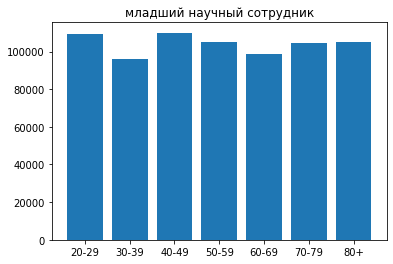

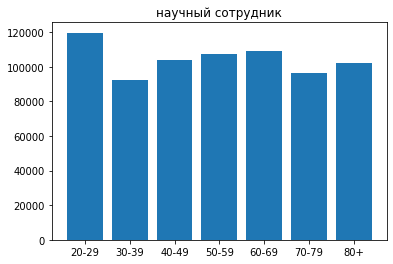

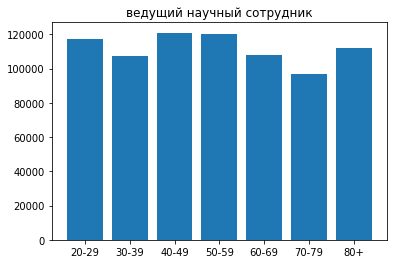

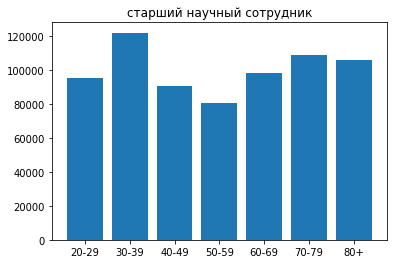

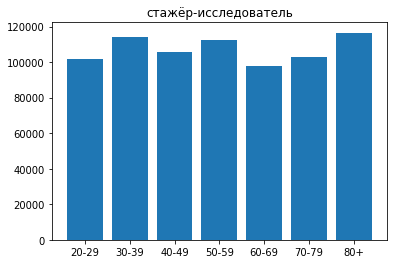

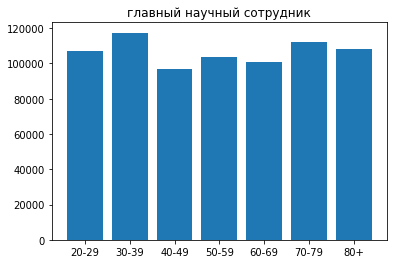

In [ ]:
x = list(empl['age_cat'].unique())
x.sort()
for pos in list(empl['Должность'].unique()):
  y = list(piv_empl[pos])
  plt.figure()
  plt.title(pos) 
  plt.bar(x, y)

У стажёров-исследователей и младших научных сотрудников зарплата действительно не сильно зависит от возраста, у главных научных и ведущих сотрудников, впрочем, тоже. У старших научных сотрудников зарплата заметно больше в 30-39 лет, чем в других возрастных категориях, у научных сотрудников – в 20-29 лет. Наше предположение оказалось отчасти верным.